# Musa Zaffar Masoodi 12208126 
# Course Code: MKT322 CA2

The aim of this assignment is to create visualizations depicting ranking, deviation,distribution, correlation, composition and change (*all 6 types are required) and then make interpretation of each visualization.

# Importing Important libraries

**numpy** - It is used to perform a wide variety of mathematical operations on arrays.

**pandas** - It is used for working with data sets.

**matplotlib.pyplot** - It is a comprehensive library for creating static, animated, and interactive visualizations.

**seaborn** - It is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from dash import Dash, dcc, html
import plotly.express as px
import streamlit as st

# Importing Dataset

In [4]:
df = pd.read_csv('C:/Users/mmusa/Downloads/user_behavior_dataset.csv')

In [5]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [6]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


# Ranking

In [8]:
device_ranking = df.groupby('Device Model')['App Usage Time (min/day)'].mean().sort_values(ascending=False)

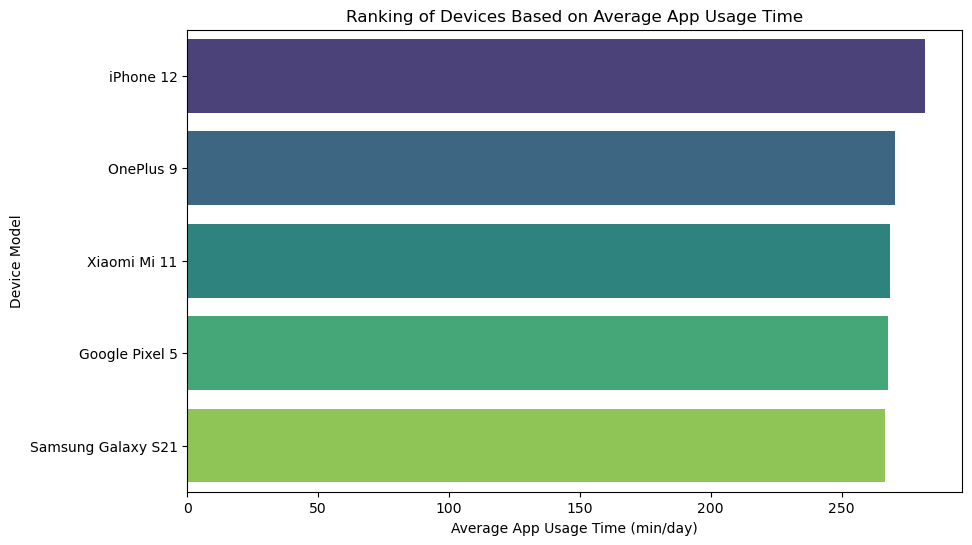

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=device_ranking.values, y=device_ranking.index, palette="viridis")
plt.xlabel('Average App Usage Time (min/day)')
plt.ylabel('Device Model')
plt.title('Ranking of Devices Based on Average App Usage Time')
plt.show()

# Deviation

In [10]:
average_battery_drain = df['Battery Drain (mAh/day)'].mean()

In [11]:
df['Battery Drain Deviation'] = df['Battery Drain (mAh/day)'] - average_battery_drain

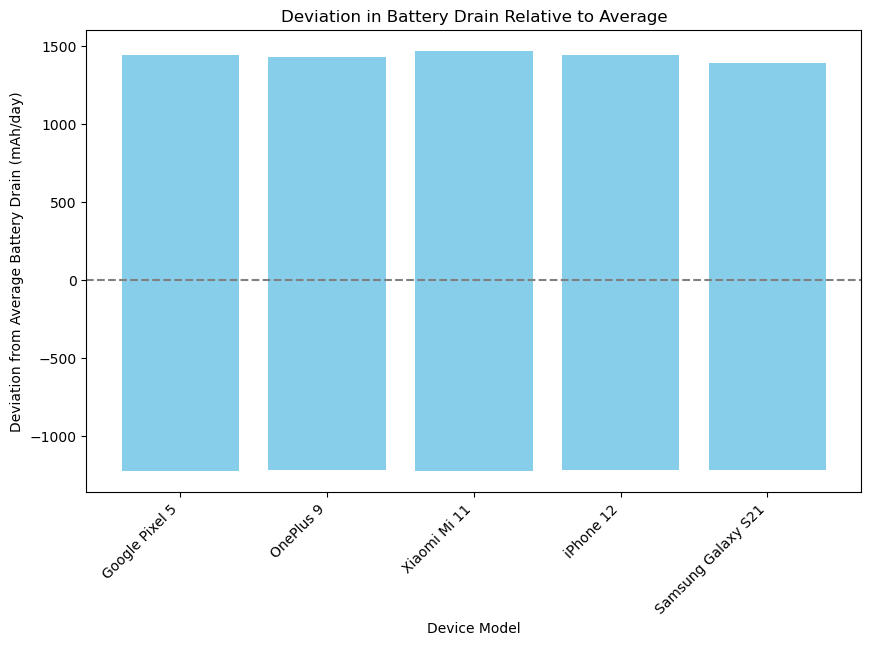

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(df['Device Model'], df['Battery Drain Deviation'], color='skyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Device Model')
plt.ylabel('Deviation from Average Battery Drain (mAh/day)')
plt.title('Deviation in Battery Drain Relative to Average')
plt.xticks(rotation=45, ha='right')
plt.show()

# Distribution

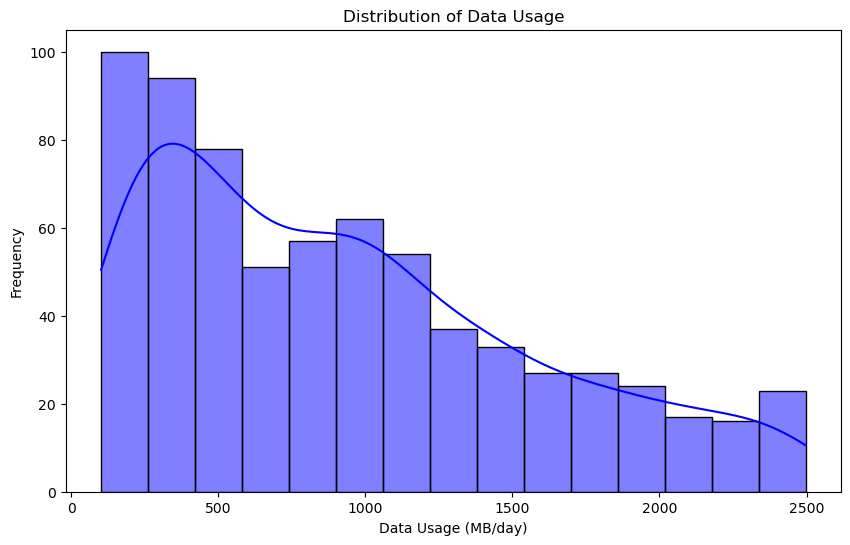

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Data Usage (MB/day)'], kde=True, color='blue', bins=15)
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frequency')
plt.title('Distribution of Data Usage')
plt.show()

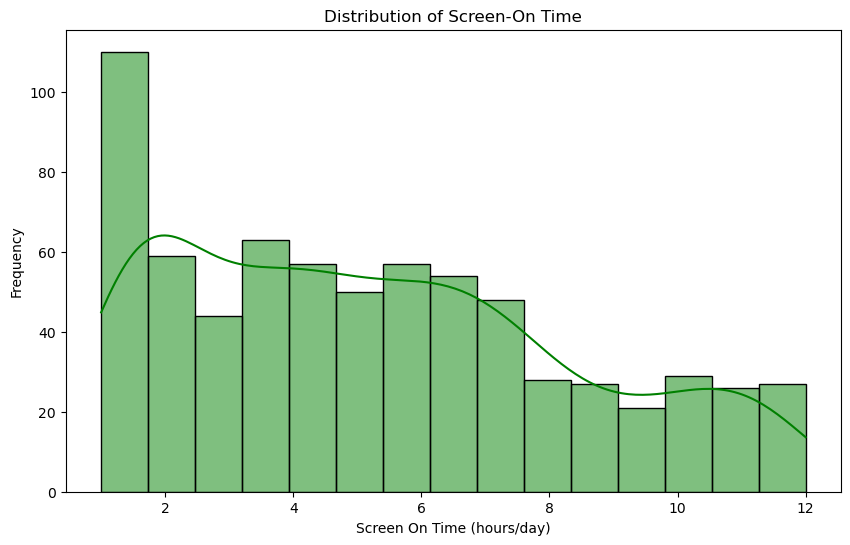

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Screen On Time (hours/day)'], kde=True, color='green', bins=15)
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Frequency')
plt.title('Distribution of Screen-On Time')
plt.show()

# Correlation

In [15]:
correlation = df['App Usage Time (min/day)'].corr(df['Battery Drain (mAh/day)'])
print(f"Correlation between App Usage Time and Battery Drain: {correlation:.2f}")

Correlation between App Usage Time and Battery Drain: 0.96


Text(0.5, 1.0, 'Correlation between App Usage Time and Battery Drain')

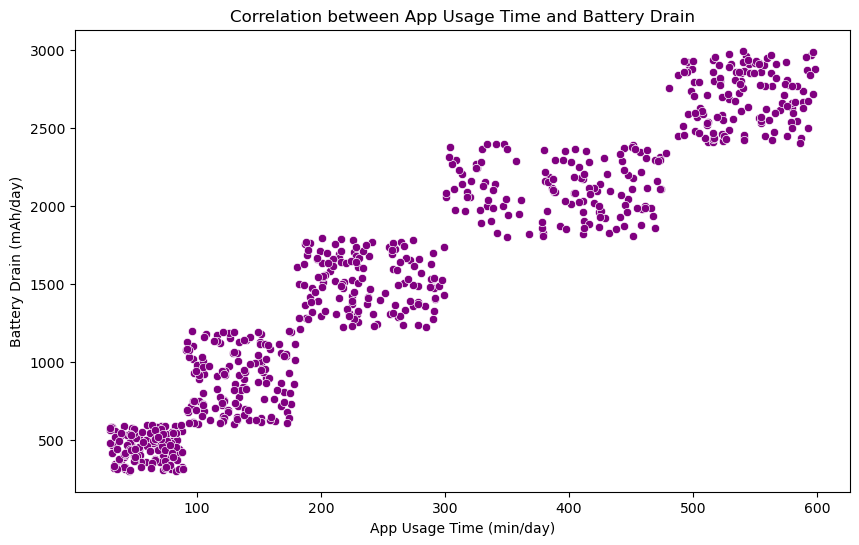

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='App Usage Time (min/day)', y='Battery Drain (mAh/day)', data=df, color='purple')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Battery Drain (mAh/day)')
plt.title('Correlation between App Usage Time and Battery Drain')


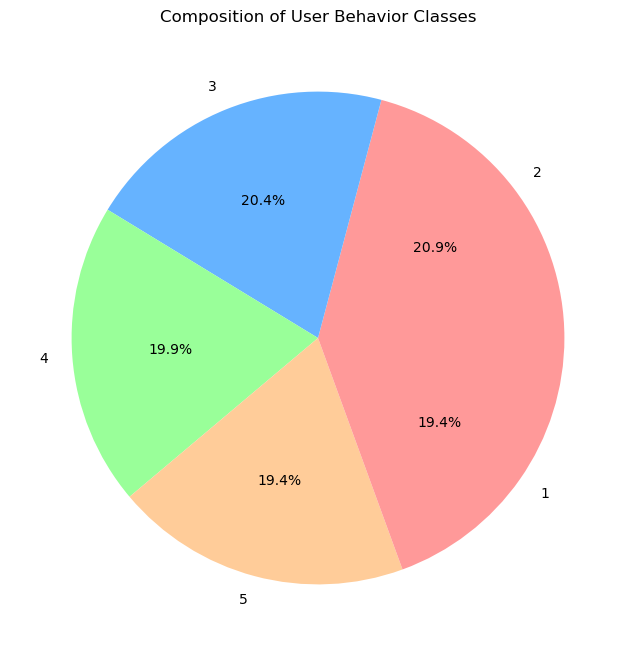

In [17]:
behavior_class_counts = df['User Behavior Class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(behavior_class_counts, labels=behavior_class_counts.index, autopct='%1.1f%%', colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'])
plt.title('Composition of User Behavior Classes')
plt.show()

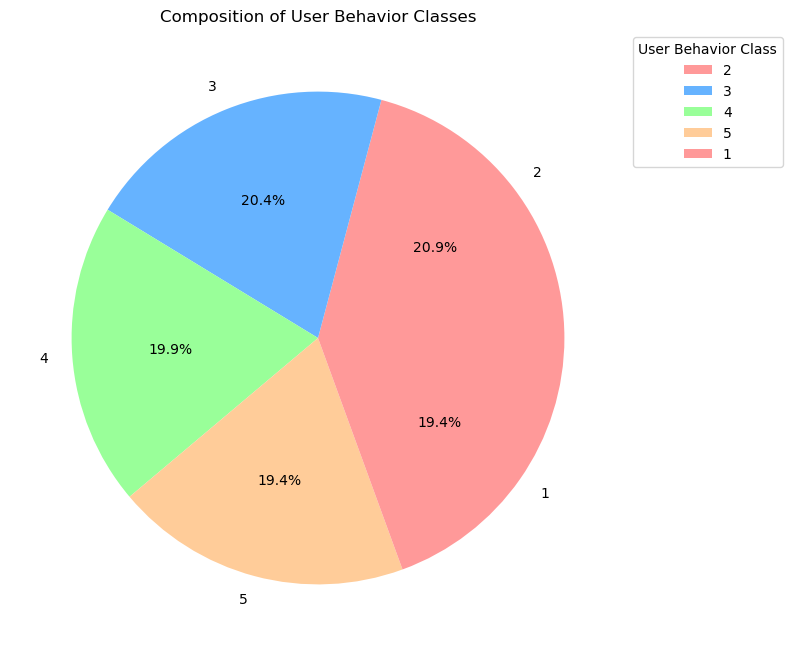

In [18]:
behavior_class_counts = df['User Behavior Class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(behavior_class_counts, labels=behavior_class_counts.index, autopct='%1.1f%%', colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'])
plt.title('Composition of User Behavior Classes')
plt.legend(behavior_class_counts.index, title="User Behavior Class", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

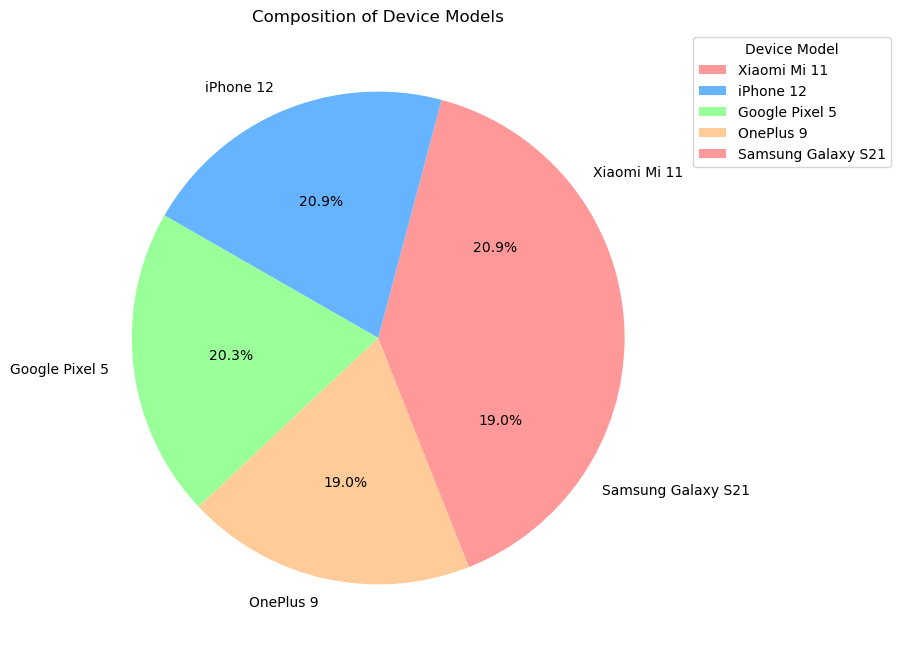

In [19]:
device_counts = df['Device Model'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'])
plt.title('Composition of Device Models')
plt.legend(device_counts.index, title="Device Model", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [20]:
from dash import Dash
print("Dash is installed and ready to use!")

Dash is installed and ready to use!


2024-11-22 09:11:14.073 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 09:11:14.804 
  command:

    streamlit run M:\Anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-22 09:11:14.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 09:11:14.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 09:11:14.806 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 09:11:14.823 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 09:11:15.011 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 09:11:15.011 Thread 'MainThread': missing ScriptR

DeltaGenerator()

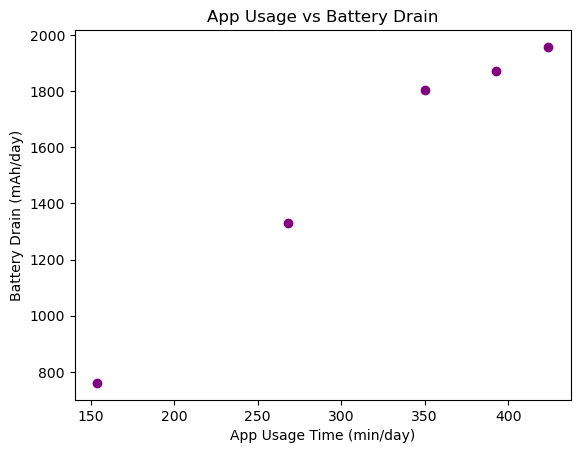

In [21]:
df = pd.DataFrame({
    'Device Model': ['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'Samsung Galaxy S21', 'iPhone 12'],
    'App Usage Time (min/day)': [393, 268, 154, 350, 424],
    'Battery Drain (mAh/day)': [1872, 1331, 761, 1802, 1957]
})

st.title("Device Usage Dashboard")

# Scatter plot
st.subheader("App Usage Time vs Battery Drain")
fig, ax = plt.subplots()
ax.scatter(df['App Usage Time (min/day)'], df['Battery Drain (mAh/day)'], color='purple')
ax.set_xlabel("App Usage Time (min/day)")
ax.set_ylabel("Battery Drain (mAh/day)")
ax.set_title("App Usage vs Battery Drain")
st.pyplot(fig)

In [22]:
pip install streamlit pandas matplotlib seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [27]:
st.sidebar.title("Dashboard Navigation")
menu = st.sidebar.radio(
    "Select a Visualization:",
    ["Ranking", "Deviation", "Distribution", "Correlation", "Composition"]
)

2024-11-22 09:19:26.122 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 09:19:26.123 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 09:19:26.123 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 09:19:26.124 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 09:19:26.124 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 09:19:26.125 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 09:19:26.126 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 09:19:26.126 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [28]:
# Ranking Chart
if menu == "Ranking":
    st.header("Ranking: Average App Usage Time by Device Model")
    # Calculate device ranking
    device_ranking = df.groupby("Device Model")["App Usage Time (min/day)"].mean().sort_values(ascending=False)
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=device_ranking.values, y=device_ranking.index, palette="viridis")
    plt.xlabel('Average App Usage Time (min/day)')
    plt.ylabel('Device Model')
    plt.title('Ranking of Devices Based on Average App Usage Time')
    st.pyplot()


2024-11-22 09:19:26.927 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 09:19:26.928 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 09:19:26.978 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 09:19:26.979 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 09:19:26.980 
Calling `st.pyplot()` without providing a figure argument has been deprecated
and will be removed in a later version as it requires the use of Matplotlib's
global figure object, which is not thread-safe.

To future-proof this code, you should pass in a figure as shown below:

```python
fig, ax = plt.subplots()
ax.scatter([1, 2, 3], [1, 2, 3])
# other plotting actions...
st.pyplot(fig)
```

If you have a specific use case that requires this functionality, please let u

In [29]:
# Deviation Chart
elif menu == "Deviation":
    st.header("Battery Drain Deviation by Device")
    # Calculate the average battery drain
    average_battery_drain = df['Battery Drain (mAh/day)'].mean()
    
    # Add deviation column
    df['Battery Drain Deviation'] = df['Battery Drain (mAh/day)'] - average_battery_drain
    
    # Create the deviation bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df['Battery Drain Deviation'], y=df['Device Model'], palette="coolwarm")
    plt.axvline(0, color='black', linestyle='--')  # Zero deviation line
    plt.xlabel('Battery Drain Deviation (mAh/day)')
    plt.ylabel('Device Model')
    plt.title('Battery Drain Deviation by Device')
    st.pyplot()

SyntaxError: invalid syntax (1238660437.py, line 2)

In [30]:
# Distribution Chart
elif menu == "Distribution":
    st.header("Distribution of Data Usage")
    # Create the histogram with KDE
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Data Usage (MB/day)'], kde=True, color='blue', bins=15)
    plt.xlabel('Data Usage (MB/day)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Data Usage')
    st.pyplot()


SyntaxError: invalid syntax (4119228908.py, line 2)

In [31]:
# Deviation Chart
elif menu == "Deviation":
    st.header("Battery Drain Deviation by Device")
    # Calculate the average battery drain
    average_battery_drain = df['Battery Drain (mAh/day)'].mean()
    
    # Add deviation column
    df['Battery Drain Deviation'] = df['Battery Drain (mAh/day)'] - average_battery_drain
    
    # Create the deviation bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df['Battery Drain Deviation'], y=df['Device Model'], palette="coolwarm")
    plt.axvline(0, color='black', linestyle='--')  # Zero deviation line
    plt.xlabel('Battery Drain Deviation (mAh/day)')
    plt.ylabel('Device Model')
    plt.title('Battery Drain Deviation by Device')
    st.pyplot()

# Distribution Chart
elif menu == "Distribution":
    st.header("Distribution of Data Usage")
    # Create the histogram with KDE
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Data Usage (MB/day)'], kde=True, color='blue', bins=15)
    plt.xlabel('Data Usage (MB/day)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Data Usage')
    st.pyplot()

# Correlation Chart
elif menu == "Correlation":
    st.header("Correlation between App Usage Time and Battery Drain")
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='App Usage Time (min/day)', y='Battery Drain (mAh/day)', data=df, color='purple')
    plt.xlabel('App Usage Time (min/day)')
    plt.ylabel('Battery Drain (mAh/day)')
    plt.title('Correlation between App Usage Time and Battery Drain')
    st.pyplot()

# Composition Chart
elif menu == "Composition":
    st.header("Composition of User Behavior Classes")
    # Calculate the counts of each behavior class
    behavior_class_counts = df['User Behavior Class'].value_counts()
    
    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        behavior_class_counts, 
        labels=behavior_class_counts.index, 
        autopct='%1.1f%%', 
        colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
    )
    plt.title('Composition of User Behavior Classes')
    st.pyplot()

SyntaxError: invalid syntax (762352973.py, line 2)